In [57]:
#importing files
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet

In [58]:
#reading dataset
headers = ['col1','col2','col3','date','landavgtemp','landavgtempuncertainity','lanmaxtemp','lanmaxtempuncertainity','landoceanavgtemp','landoceanavgtempuncertainity']
dtypes = {'col1':'str','col2':'str','col3':'str','date':'date','landavgtemp':'float','landavgtempuncertainity':'float','lanmaxtemp':'float','lanmaxtempuncertainity':'float',
          'landoceanavgtemp':'float','landoceanavgtempuncertainity':'float'}
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Surface Temperature Data.csv")


In [59]:
#vieweing the top 5 rows within the dataframe
dataset.head(5)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750,1.0,1.0,1/1/1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2.0,1.0,2/1/1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3.0,1.0,3/1/1750,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4.0,1.0,4/1/1750,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5.0,1.0,5/1/1750,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#dropping columns that are not essential 
dataset.drop(columns  = ['Unnamed: 0','Unnamed: 1','Unnamed: 2','LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty',
                         'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'], inplace = True)

In [61]:
#final dataset after removing extra columns

dataset=dataset.rename(columns={'Date':'ds', 'LandAverageTemperature':'y'})
dataset.head(5)

,ds,y
0,1/1/1750,3.034
1,2/1/1750,3.083
2,3/1/1750,5.626
3,4/1/1750,8.490
4,5/1/1750,11.573


In [62]:
#extracting year and month from the date column in the dataframe

dataset['date'] = pd.to_datetime(dataset['ds'])
dataset['yr'] = dataset['date'].map(lambda x:x.year)
dataset['m'] = dataset['date'].map(lambda x:x.month)

In [63]:
#calculating total how many number of years the db has
year_max = dataset['yr'].max()
year_min = dataset['yr'].min()

length = year_max - year_min +1

#creating a list of years to store all year values
years = [year_min]

for i in range (1, length):
  years.append(year_min + i)

In [64]:
#calculating the mean over a set of years since we are calculating yearly predictions

meantemperature = dataset['y'].groupby(dataset['yr']).mean()

In [65]:
#creating a new dataframe to store the data 

average = pd.DataFrame()
average['y']=meantemperature
average['Year']=years

average['ds']=pd.to_datetime(average['Year'], format='%Y')
length
average.head()

,y,Year,ds
yr,,,
1750,8.373542,1750,1750-01-01
1751,7.684188,1751,1751-01-01
1752,6.510208,1752,1752-01-01
1753,8.388083,1753,1753-01-01
1754,8.469333,1754,1754-01-01


In [66]:
#Forecasting using fbprophet

pred = Prophet()
pred.fit(average)
#predict the next n number of years, substitute n in periods, frequency is yearly
future = pred.make_future_dataframe(periods=25, freq = 'Y')
forecast = pred.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1750-01-01,8.123525,7.623301,8.610737
1,1751-01-01,8.064139,7.573572,8.533308
2,1752-01-01,8.005867,7.522322,8.509903
3,1753-01-01,8.188766,7.689738,8.663859
4,1754-01-01,8.128343,7.646775,8.597993
...,...,...,...,...
286,2035-12-31,9.409588,8.927753,9.921373
287,2036-12-31,9.550045,9.061500,10.041358
288,2037-12-31,9.517412,8.990626,9.974684
289,2038-12-31,9.486583,8.973074,9.962185


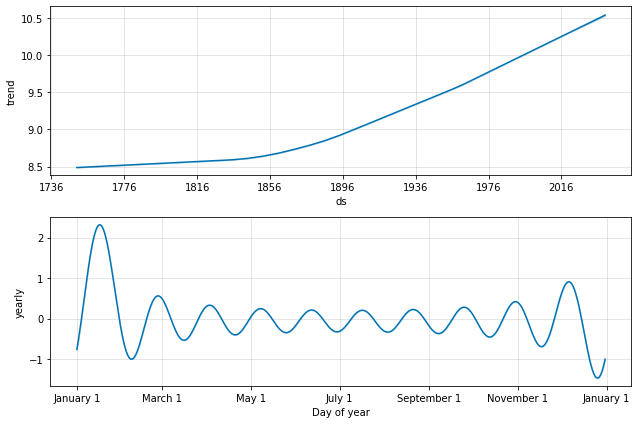

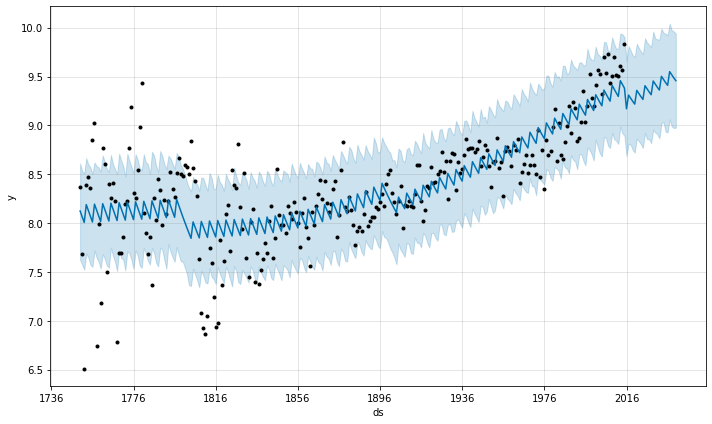

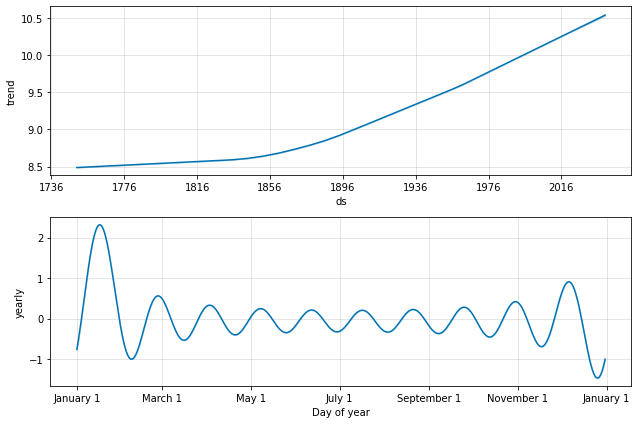

In [68]:
#plotting the forecast and the forecast components
pred.plot(forecast)
pred.plot_components(forecast)

In [69]:
#saving the data
forecast.to_csv("/content/drive/MyDrive/Colab Notebooks/Prophet for Surface Temp - Yearly.csv")

In [70]:
#forecast.head()
train = average.iloc[:266,:]
test = forecast.iloc[266:,:]
#test.head(5)

meany = test['trend'].mean()
test['calculated'] = abs((meany - test['yhat'])/meany)
err = test['calculated'].mean()
print("Accuracy:", (1-err)*100 , " %")



Accuracy: 90.1483927981309  %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
